In [151]:
import json
import numpy as np

In [152]:
json_path = "../metafiles/embeddings.json"
with open(json_path) as f:
    data = json.load(f)

In [153]:
links = list(data.keys())
embeddings = list(data.values())

links = np.array(links)
embeddings = np.array(embeddings)

embeddings[0]

array([-4.45103981e-02, -2.67202761e-02, -7.66254440e-02,  4.73970827e-03,
       -8.32474530e-02, -7.76158739e-03, -3.89189646e-02, -7.38547593e-02,
        4.73898575e-02, -9.00770575e-02, -2.75778770e-02, -7.26299658e-02,
       -9.51051433e-03, -2.27009617e-02,  1.41641814e-02, -1.50137573e-01,
        3.84710580e-02,  1.03034358e-02, -3.60514857e-02, -8.31667408e-02,
       -3.26615050e-02, -3.46640088e-02, -3.97497788e-02, -4.44677323e-02,
       -1.84374060e-02, -7.58627336e-03,  1.45391384e-02,  2.27724146e-02,
       -6.85305567e-04,  2.46937256e-02,  1.27862602e-01,  7.47384969e-04,
        5.02950177e-02, -3.74084227e-02, -7.59412125e-02,  2.81681381e-02,
       -9.62161180e-03,  6.76029176e-02,  2.95540653e-02,  2.48682243e-03,
       -2.25926144e-03, -8.90647471e-02,  5.79690263e-02, -2.21039001e-02,
        3.56284939e-02,  7.62658343e-02, -6.96117654e-02, -1.01800054e-01,
       -3.94512303e-02, -1.24582797e-01, -7.37590119e-02,  3.64559218e-02,
        3.10565287e-04, -

In [154]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

def get_cluster_model(n_clusters, embeddings):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embeddings)
    return kmeans

def reduce_dim(n_components, embeddings, reduce_type='pca'):
    if reduce_type == 'pca':
        model = PCA(n_components=n_components)
    elif reduce_type == 'tsne':
        model = TSNE(n_components=n_components)
        
    return model.fit_transform(embeddings)

def get_data_clusters(n_clusters, links, embeddings):
    kmeans = get_cluster_model(n_clusters, embeddings)
    clusters = kmeans.labels_
    df = pd.DataFrame({'links': links, 'cluster': clusters})
    inertia = kmeans.inertia_
    return df, inertia


def get_reduced_data_clusters(n_clusters, links, embeddings, n_components, reduce_type='pca'):
    red_embeddings = reduce_dim(n_components, embeddings, reduce_type=reduce_type)
    df, inertia = get_data_clusters(n_clusters, links, red_embeddings)
    df['x'] = red_embeddings[:, 0]
    df['y'] = red_embeddings[:, 1]
        
    return df, inertia

In [155]:
clustered_df, inertia = get_data_clusters(10, links, embeddings)
clustered_df[clustered_df['cluster'] == 0][:10]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,links,cluster
0,44ot5_2UaaU,0
4,-bmS0RumV9U,0
13,4y52DCrkLeU,0
44,3skPQLfdIpo,0
48,4cQDgvv9lvs,0
56,1AdHLhBbWes,0
60,2I5SiHuVoRg,0
61,-jGtG8HcJEU,0
124,15opb5P2eTw,0
150,1SdLOx_YhxM,0


In [157]:
n_clusters = np.arange(1, 21)
inertia_pca, df_pca = [], []
inertia_tsne, df_tsne = [], []

for n_cluster in n_clusters[::2]:
    df, inertia = get_reduced_data_clusters(n_cluster, links, embeddings, 2, reduce_type='pca')
    inertia_pca.append(inertia)
    df_pca.append(df)
    
    df, inertia = get_reduced_data_clusters(n_cluster, links, embeddings, 2, reduce_type='tsne')
    inertia_tsne.append(inertia)
    df_tsne.append(df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

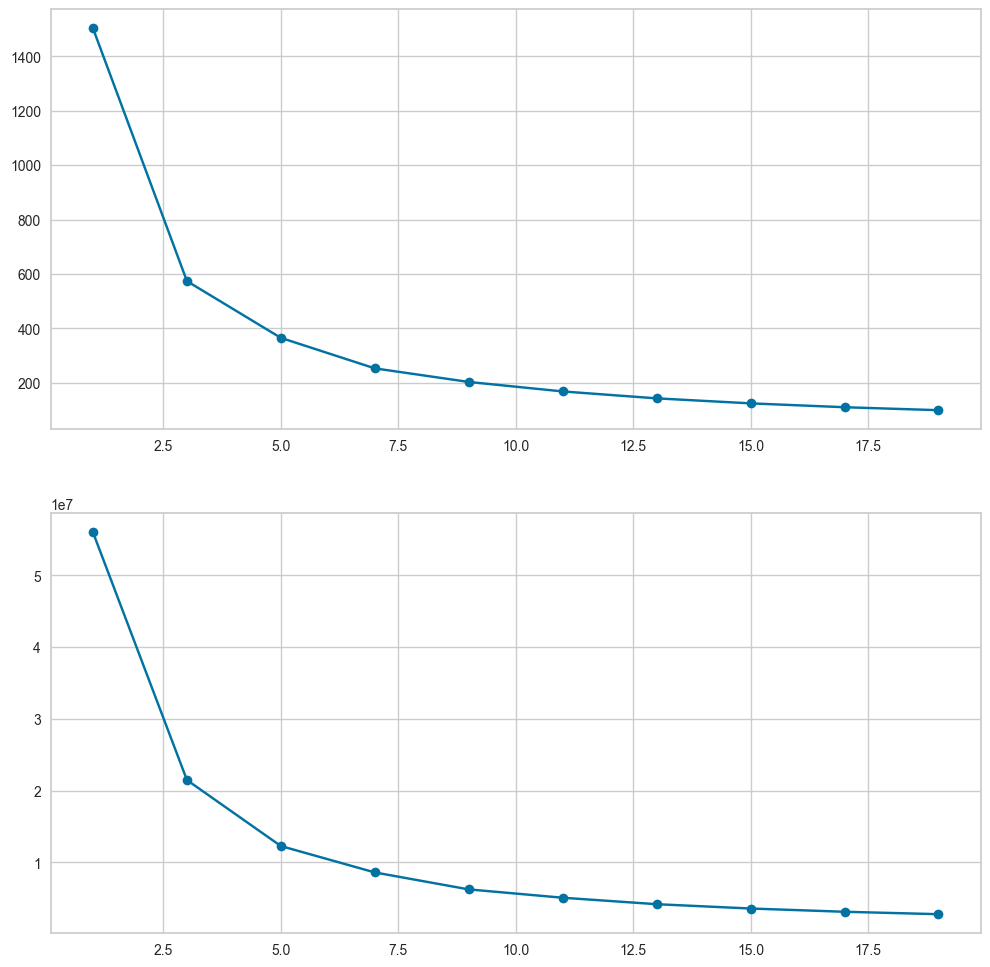

In [159]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(n_clusters[::2], inertia_pca, marker='o')
plt.subplot(2, 1, 2)
plt.plot(n_clusters[::2], inertia_tsne, marker='o')

In [185]:
best_df_pca = df_pca[3]
best_df_tsne = df_tsne[3]

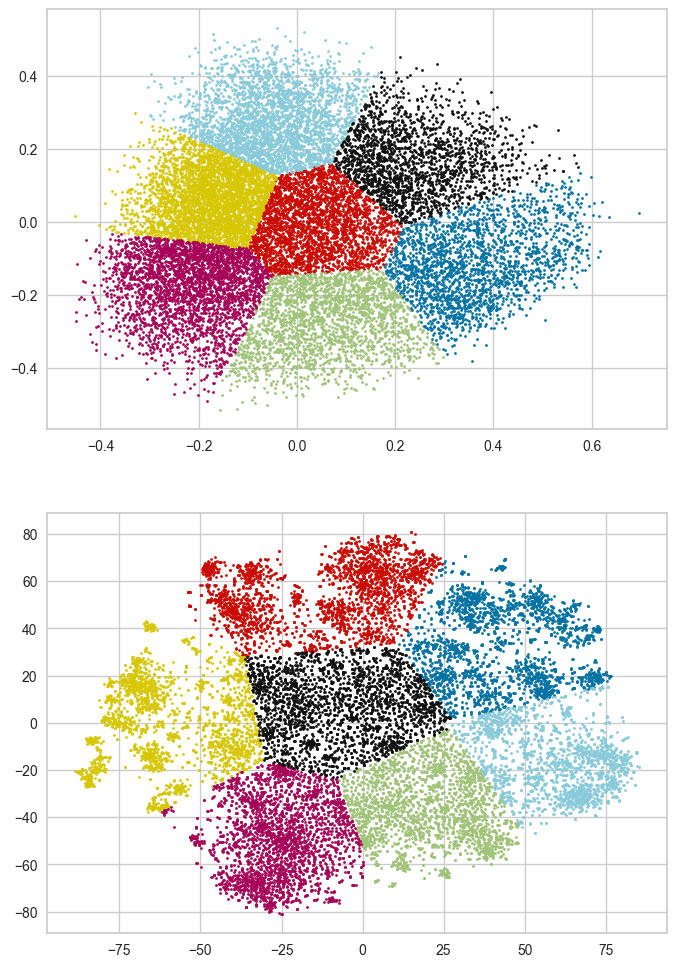

In [188]:
plt.figure(figsize=(8, 12))
plt.subplot(2, 1, 1)
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'w']
for c in range(7):
    plt.plot(best_df_pca[best_df_pca['cluster'] == c]['x'], best_df_pca[best_df_pca['cluster'] == c]['y'], marker='o', linestyle='', markersize=2, color=colors[c])
    
plt.subplot(2, 1, 2)
for c in range(7):
    plt.plot(best_df_tsne[best_df_tsne['cluster'] == c]['x'], best_df_tsne[best_df_tsne['cluster'] == c]['y'], marker='o', linestyle='', markersize=2, color=colors[c])

In [199]:
df_pca, inertia_pca = get_reduced_data_clusters(1000, links, embeddings, 2, reduce_type='pca')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


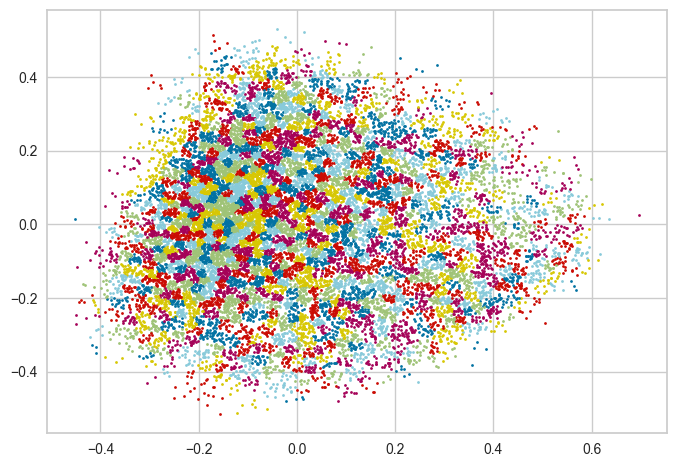

In [200]:
for c in range(1000):
    plt.plot(df_pca[df_pca['cluster'] == c]['x'], df_pca[df_pca['cluster'] == c]['y'], marker='o', linestyle='', markersize=2)

In [201]:
df_tsne, inertia_tsne = get_reduced_data_clusters(1000, links, embeddings, 2, reduce_type='tsne')

In [ ]:
for c in range(1000):
    plt.plot(df_tsne[df_tsne['cluster'] == c]['x'], df_tsne[df_tsne['cluster'] == c]['y'], marker='o', linestyle='', markersize=2)